# Deep Learning Project 8 - Find Similar Words :
---
- ### Write a program that takes in data from a text corpus as input and uses natural language processing (NLP) techniques to find similar words based on their relationships.

- ### Your task is to choose an appropriate NLP algorithm for finding the similarity score between different words based on available data. You can use metrics such as cosine similarity or Euclidean distance to evaluate the performance of your model.

- ### Once you have built your model with good performance, you need to deploy it on a web browser using a framework like Django, Flask, or Streamlit.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary libraries :

In [2]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the train and test datasets from the specified paths into pandas DataFrames named train and test.

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/Datasets/train_tweet.csv')
test = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/Datasets/test_tweets.csv')

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## Below code selects and displays the first 5 rows of the train DataFrame where the **'label'** column is equal to 0.
- ### **label 0 :** represents one class (e.g., "not spam", "negative sentiment").

In [6]:
train[train['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Let's check **label 1** which represents the other class (e.g., "spam", "positive sentiment").

In [7]:
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


## Let's check dimensions of the Pandas DataFrames **'train'** and **'test'** as (number of rows, number of columns) :

In [8]:
train.shape

(31962, 3)

In [9]:
test.shape

(17197, 2)

## Let's check the count of unique values (0 and 1) in the 'label' column of the DataFrame 'train'.

In [10]:
train.label.value_counts()

,count
label,
0,29720
1,2242


## Below code concatenates the **train** and **test** DataFrames vertically, resets the index, and then displays the shape (rows, columns) of the combined DataFrame **df**.

In [11]:
df = pd.concat([train, test], ignore_index=True)
df.shape

(49159, 3)

## Below function **remove_pattern** aims to find all occurrences of a given pattern in a text and remove them.

- ### It uses **re.findall** to find the pattern and **re.sub** to replace the occurences by empty strings to remove them.

In [12]:
def remove_pattern(input_txt, pattern) :
  r = re.findall(pattern, input_txt)
  for i in r :
    input_txt = re.sub(i, "", input_txt)
  return input_txt

## Applying the **remove_pattern** function to the **'tweet'** column of the DataFrame **df** to remove Twitter handles and stores the result in a new column named **'tidy_tweet'**.

In [13]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Replacing all characters in the **tidy_tweet** column that are not letters (a-z, A-Z) or the hash symbol (#) with spaces.

In [14]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing words with length less than or equal to 3 from the **'tidy_tweet'** column of the DataFrame **df**.

In [15]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x : " ".join([w for w in x.split() if len(w) > 3]))
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


# Performing a basic form of tokenization :
---
## Splitting each string in the **'tidy_tweet'** column into a list of words :
- ### Tokenization is the process of breaking down text into individual units called tokens. In this case, the code splits each tweet in the tidy_tweet column into a list of individual words, which are the tokens. This is a fundamental step in many Natural Language Processing (NLP) tasks.

- ### Below code performs a basic form of tokenization by splitting the text on spaces.

In [16]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


##  Importing the **PorterStemmer** class from **NLTK** and creates an instance for stemming words :

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

## Below line applies stemming to each word in **tokenized_tweet** using the PorterStemmer to reduce words to their root form.

In [18]:
tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x])

## Joining stemmed words back into a single string for each tweet and updating the **'tidy_tweet'** column in the DataFrame with these joined strings :

In [19]:
for i in range(len(tokenized_tweet)) :
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['tidy_tweet'] = tokenized_tweet

## Below we have the stemmed version of the tweets :

In [20]:
df.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


## Combining all the stemmed tweets from the 'tidy_tweet' column into a single string named 'all_words', separated by spaces :

In [21]:
all_words = ' '.join([text for text in df['tidy_tweet']])

## Below code generates and displays a word cloud visualization from the text in **all_words** using the **wordcloud** library.

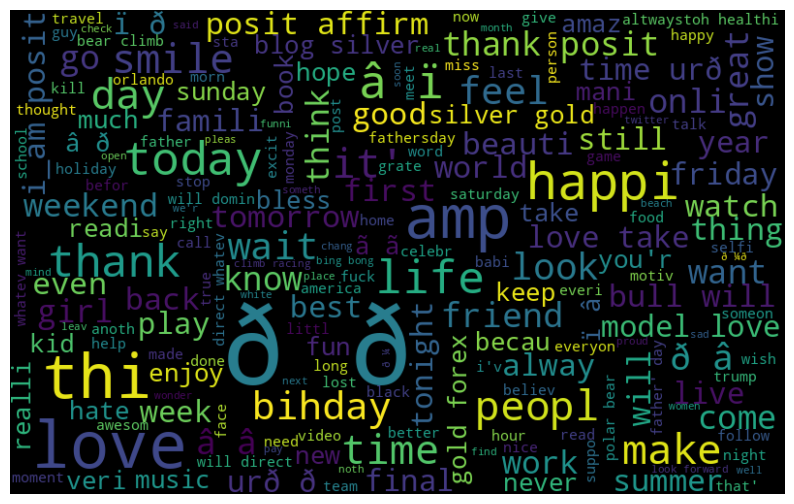

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Below code joins all the tweets labeled as negative (label 1) into a single string called **negative_words**.

In [23]:
negative_words = ' '.join([text for text in df['tidy_tweet'][df['label'] == 1]])

## Below code generates and displays a word cloud of negative words with specified dimensions, randomness, font size, and interpolation.

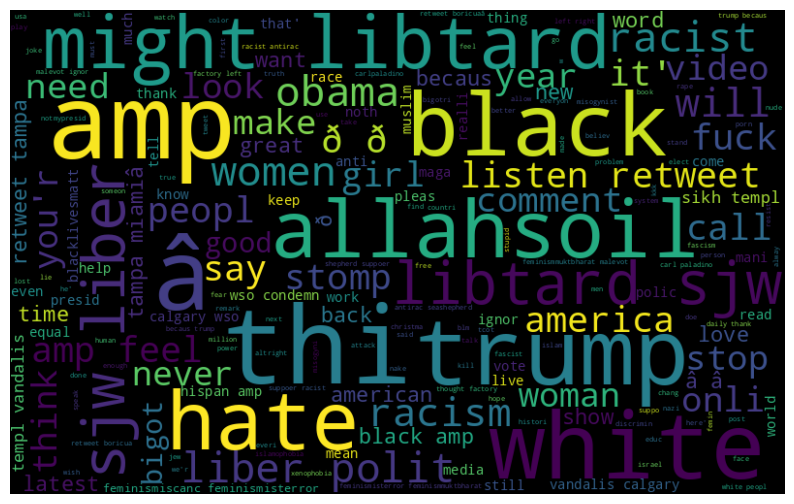

In [24]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Importing necessary classes for **text feature extraction** and **word embedding** :

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

## Below code creates a Bag-of-Words (BoW) representation of the tweets using CountVectorizer with specified parameters and applies it to the 'tidy_tweet' column.

## **Reasoning :**

- ### **bow_vectorizer = CountVectorizer(...) :** Initializes a CountVectorizer object with parameters for text preprocessing. **max_df = 0.90** ignores words appearing in more than 90% of documents, **min_df = 2** ignores words appearing in less than 2 documents, **max_features = 1000** limits the vocabulary to 1000 most frequent words, and **stop_words = 'english'** removes common English words.

- ### **bow = bow_vectorizer.fit_transform(df['tidy_tweet']) :** Applies the CountVectorizer to the 'tidy_tweet' column of the DataFrame to create a BoW representation. It first learns the vocabulary from the data (**fit**) and then transforms the text into a numerical matrix (**transform**), where each row represents a tweet and each column represents a word in the vocabulary. The cell value indicates the frequency of that word in the tweet.

In [26]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['tidy_tweet'])

In [27]:
bow.shape

(49159, 1000)

## Below code creates a **TF-IDF** representation of tweets using **CountVectorizer** and displays its shape.

In [28]:
tfidf_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(df['tidy_tweet'])
tfidf.shape

(49159, 1000)

## Below code tokenizes the **'tidy_tweet'** column in the dataframe **df** by splitting each tweet into a list of words and then displays the dimensions of the resulting series **tokenized_tweet**.

In [29]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x : x.split())
tokenized_tweet.shape

(49159,)

## Below code trains a **Word2Vec** model on tokenized tweets using skip-gram, negative sampling, and specified parameters for word embeddings.

In [30]:
model_w2v = gensim.models.Word2Vec(tokenized_tweet,
                                   vector_size = 300,
                                   window = 7,
                                   min_count = 3,
                                   sg = 0,
                                   hs = 0,
                                   negative = 5,
                                   workers = 4,
                                   seed = 34)

## Below code trains the **Word2Vec** model for **20 epochs** on the tokenized tweets.

In [31]:
model_w2v.train(tokenized_tweet, total_examples = len(df['tidy_tweet']), epochs = 20)

(6258462, 8184140)

## Below code finds words semantically similar to **"lunch"** using the trained **Word2Vec** model.

In [32]:
model_w2v.wv.most_similar(positive = 'lunch')

[('breakfast', 0.8178398013114929),
 ('dinner', 0.7815868258476257),
 ('brunch', 0.7226510643959045),
 ('chill', 0.7212011814117432),
 ('pool', 0.7055094242095947),
 ('besti', 0.6921085119247437),
 ('wine', 0.6849937438964844),
 ('meal', 0.6608480215072632),
 ('#brunch', 0.6592020988464355),
 ('sushi', 0.6567385792732239)]

## Evaluating the model using cosine similarity :
- ### **Reasoning :** Cosine similarity is a common metric to measure the similarity between two word vectors. It calculates the cosine of the angle between the vectors, resulting in a value between -1 and 1. A higher value indicates greater similarity.

In [33]:
# Importing cosine_similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity

# Getting the vector for the word "lunch"
lunch_vector = model_w2v.wv['lunch']

# Getting the vector for the word "dinner"
dinner_vector = model_w2v.wv['dinner']

# Calculating cosine similarity
similarity = cosine_similarity(lunch_vector.reshape(1, -1), dinner_vector.reshape(1, -1))

print(f"Cosine similarity between 'lunch' and 'dinner': {similarity[0][0]}")

Cosine similarity between 'lunch' and 'dinner': 0.7815868258476257


## **Interpretation :**
---
### **Range :** Cosine similarity ranges from -1 to 1.
- ### 1 indicates perfect similarity.
- ### 0 indicates no similarity.
- ### -1 indicates perfect dissimilarity.
### **The cosine similarity score of approximately 0.78 :** suggests a relatively high degree of similarity between the words "lunch" and "dinner" according to our trained Word2Vec model.

## **Reasoning :**

- ### **Semantic Relationship :** This score is closer to 1 (perfect similarity) than to 0 (no similarity). This indicates that the model has learned a strong semantic relationship between these two words, likely because they often appear in similar contexts within the tweet data.
- ### **Contextual Similarity :** Lunch and dinner are both meals typically eaten at specific times of the day. They often involve similar types of food and social contexts. The model has likely captured these shared contextual associations, leading to a high similarity score.

### **Consideration :**

- ### While the score indicates a strong relationship, it's not a perfect 1. This is expected, as "lunch" and "dinner" are distinct concepts with some differences in timing, formality, and cultural connotations. The model acknowledges these nuances while still recognizing their overall similarity.


## Below line saves our trained model to a file named **"word2vec.model"** in **'/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/Models/word2vec.model'**. This file will be used later by our Flask application.

In [34]:
model_w2v.save('/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/Models/word2vec.model')

# Creating an empty **'app.py'** file in Google Drive :
---
- ### Below code opens a file named **app.py** in the specified location within our Google Drive in write mode ('w'). The pass statement does nothing, ensuring that the file is created without any content.

In [35]:
with open('/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/app.py', 'w') as f:
    pass

# Writing Flask code into the **app.py** file :
---


In [36]:
%%writefile "/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/app.py"
from flask import Flask, request, jsonify
from gensim.models import Word2Vec
from google.colab import drive

app = Flask(__name__)

# Mounting Google Drive
drive.mount('/content/drive')

# Loading the saved Word2Vec model
model_w2v = Word2Vec.load('/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/Models/word2vec.model')

@app.route('/similar_words', methods=['POST'])
def similar_words():
    word = request.json['word']
    try:
        similar_words = model_w2v.wv.most_similar(positive=word)
        return jsonify(similar_words)
    except KeyError:
        return jsonify({'error': 'Word not found in vocabulary'}), 404

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)

Overwriting /content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects/app.py


# Installing Flask :
- ### Below code installs the necessary Flask library in our Colab environment.

In [37]:
!pip install Flask

# Importing necessary modules :
---
- ### **sys :** Used to modify the system path to include the directory containing our **app.py** file.
- ### **threading :** Used to run the Flask server in a separate thread, preventing it from blocking the notebook's execution.

In [38]:
import sys
import threading

#  Appending the path to **app.py** to the system path :
- ### This adds the directory containing our **app.py** file to the system path, allowing Python to find and import the Flask application.

In [39]:
sys.path.append('/content/drive/MyDrive/Data_Science/Projects/Deep Learning Projects')

# Importing the Flask app and run it in a separate thread :

In [40]:
# Import Flask after installing it
from app import app  # Importing our Flask app from app.py

def start_flask_server() :
   # Flask run is changed here!
   # using the werkzeug server for enhanced threading
   from werkzeug.serving import make_server

   server = make_server('0.0.0.0', 5000, app)
   server.serve_forever()

flask_thread = threading.Thread(target=start_flask_server)
flask_thread.start()

print("Flask server started. Access the API at http://localhost:5000/similar_words") # Assuming your endpoint is '/similar_words'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Flask server started. Access the API at http://localhost:5000/similar_words


### Now we've successfully started the Flask server within our Colab notebook. To complete the task of deploying our model on a web browser using Flask, we need to make it accessible through a public URL and then test it using that URL.
---
# **What is pyngrok ?**

- ### **pyngrok** is a Python library that allows us to interact with the ngrok service programmatically. **ngrok** itself is a tool that creates secure tunnels from our local machine to the public internet. This is particularly useful when we're developing web applications locally and want to make them accessible to others without deploying them to a server.
- ### By using **pyngrok**, we create a public URL that forwards traffic to our local Flask server. This allows anyone with the public URL to access our Flask application running on our local machine.

In [41]:
!pip install pyngrok

## Below code imports **ngrok**, authenticates with our **token**, creates a **public URL** for our local port 5000, and prints the URL.
---
# **How to get the 'Authtoken' ?**
- ### First we visit **'https://ngrok.com/docs/agent/'** > then **sign up** using my **google account** > then we will visit **'https://dashboard.ngrok.com/get-started/your-authtoken'** > click on **'Your Authtoken'** > copy the authtoken and paste below inside **'ngrok.set_auth_token()'.**

In [44]:
from pyngrok import ngrok

# Setting our Authtoken
ngrok.set_auth_token("2nXJIWJkImOA6cMa6wkFFAX4s3O_7n7QdidXRe2KekhhprPWM")

# Opening a tunnel to port 5000
public_url = ngrok.connect(5000)
print(public_url)

NgrokTunnel: "https://a1a7-35-231-221-113.ngrok-free.app" -> "http://localhost:5000"


### Now we have successfully generated a public URL for your **Flask** server using **ngrok**. Now, we can access our deployed API through this public URL.
### If we look closely at the **"NgrokTunnel"** message. It shows two URLs:

- ### The first one, enclosed in quotes after **"NgrokTunnel: "**, is our **public URL**, which is :  https://a1a7-35-231-221-113.ngrok-free.app.
- ### The second URL is our **local server address (http://localhost:5000).**
---
# **Here's what we need to do next :**

## **Copy the public URL - This is the address we'll use to access our deployed model from the internet :**

- ### The output we received **(NgrokTunnel: "https://a1a7-35-231-221-113.ngrok-free.app" -> "http://localhost:5000")** indicates that ngrok has created a tunnel to our Flask server running on **http://localhost:5000**, and it's accessible through the public URL **https://a1a7-35-231-221-113.ngrok-free.app**.
- ### Copy this public URL **(https://a1a7-35-231-221-113.ngrok-free.app)**.
---
# **Access our deployed API :**

- ### We have to open a new web browser tab or use a tool like curl or Postman.
- ### Paste the public URL into the address bar or the request URL field, followed by our API endpoint. For example, as our API endpoint is : **/similar_words**, the complete URL would be : **https://a1a7-35-231-221-113.ngrok-free.app/similar_words.**
- ### Now we will send a request to this URL (typically a POST request with the word we want to find similar words for).


# Accessing the **deployed API** using the **curl** command :
---
- ### **!curl :** This invokes the curl command within our Colab environment. curl is a command-line tool used for transferring data to and from servers.
- ### **-X POST :** This specifies that we are sending a **POST** request to the **API**. **POST requests are commonly used to send data to the server.**
- ### **-H "Content-Type: application/json" :** This header tells the server that the data being sent is in **JSON format**.
- ### **-d '{"word": "lunch"}' :** This is the data payload of the request. It's a **JSON object** containing the word "lunch," which we want to find similar words for.
- ### **https://a1a7-35-231-221-113.ngrok-free.app/similar_words :** This is the URL of your deployed API endpoint. It includes the ngrok public URL and the endpoint path **(/similar_words).**

In [51]:
!curl -X POST -H "Content-Type: application/json" -d '{"word": "lunch"}' https://a1a7-35-231-221-113.ngrok-free.app/similar_words

INFO:werkzeug:127.0.0.1 - - [16/Oct/2024 22:15:14] "POST /similar_words HTTP/1.1" 200 -


[["breakfast",0.8178398013114929],["dinner",0.7815868258476257],["brunch",0.7226510643959045],["chill",0.7212011814117432],["pool",0.7055094242095947],["besti",0.6921085119247437],["wine",0.6849937438964844],["meal",0.6608480215072632],["#brunch",0.6592020988464355],["sushi",0.6567385792732239]]


## Below code sends a **POST request** to a **Flask API endpoint (/similar_words)** with the word **"lunch"** to get similar words and prints the response.

In [52]:
import requests
            # Below function sends a POST request to a Flask API to get similar words for a given word and
                                    # returns the results or an error message
def get_similar_words(word):
  url = "https://a1a7-35-231-221-113.ngrok-free.app/similar_words"
  data = {"word": word}
  headers = {"Content-Type": "application/json"}
  response = requests.post(url, json=data, headers=headers)

  if response.status_code == 200:
      return response.json()
  else:
      return {"error": f"Request failed with status code: {response.status_code}"}

# Getting similar words for "lunch"
similar_words = get_similar_words("lunch")
print(similar_words)

INFO:werkzeug:127.0.0.1 - - [16/Oct/2024 22:15:19] "POST /similar_words HTTP/1.1" 200 -


[['breakfast', 0.8178398013114929], ['dinner', 0.7815868258476257], ['brunch', 0.7226510643959045], ['chill', 0.7212011814117432], ['pool', 0.7055094242095947], ['besti', 0.6921085119247437], ['wine', 0.6849937438964844], ['meal', 0.6608480215072632], ['#brunch', 0.6592020988464355], ['sushi', 0.6567385792732239]]


## Below lines of code calls the **get_similar_words** function with the word **"trump"** as an argument and prints the returned similar words.

In [57]:
dinner_similar_words = get_similar_words("trump")
print(dinner_similar_words)

INFO:werkzeug:127.0.0.1 - - [16/Oct/2024 22:19:09] "POST /similar_words HTTP/1.1" 200 -


[['rally.', 0.8171603679656982], ['hillari', 0.7968395948410034], ['donald', 0.7899086475372314], ['obama', 0.7785747647285461], ['suppoer', 0.7624074220657349], ['presid', 0.7435774803161621], ['#dementeddonni', 0.7435640692710876], ['#gop', 0.7424117922782898], ['vote', 0.7392179369926453], ['campaign', 0.7340749502182007]]
